# Importing Libraries


In [36]:
#import libraries
import numpy as np
import pandas as pd
import sys
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import sklearn.metrics
from sklearn.metrics import f1_score, confusion_matrix, classification_report, RocCurveDisplay, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score,recall_score,precision_score, roc_curve, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading Data File

In [37]:
data = pd.read_csv('/content/data_project.csv')

In [38]:
data.head(6)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


# Describing Data

In [39]:
data.describe()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,431.000000,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,249.270937,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,215.500000,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,431.000000,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,646.500000,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,862.000000,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [40]:
data.shape

(863, 15)

In [41]:
data.columns

Index(['Unnamed: 0', 'location', 'country', 'gender', 'age', 'vis_wuhan',
       'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4',
       'symptom5', 'symptom6', 'diff_sym_hos', 'result'],
      dtype='object')

# Partitioning Data

In [42]:
X = data.iloc[: , 1:-1]
y = data.iloc[:,-1]

In [43]:
X.shape

(863, 13)

In [44]:
y.shape

(863,)

In [45]:
y.value_counts()

0    755
1    108
Name: result, dtype: int64

# Prepeocessing Data

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,  test_size=0.1, stratify=y, random_state = 0) 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,  test_size=0.2, stratify=y_train_val, random_state = 0) 

In [47]:
X_train.shape

(620, 13)

In [48]:
X_test.shape

(87, 13)

In [49]:
X_val.shape

(156, 13)

## Function of Evaluating metrics

In [50]:
def Evaluating_metrics(val, pred):
  print("Training Accuracy:", accuracy_score(val, pred))
  print("Training Recall:", recall_score(val, pred))
  print("Training Percision:", precision_score(val, pred))
  print("Training F1_Score:", f1_score(val, pred))
  print("Training ROC_AUC_curve:", roc_auc_score(val, pred))
  print("Training ROC curve:", roc_curve(val, pred))
  print("Training Precision_Recaal_curve:", precision_recall_curve(val, pred))

def Evaluating_metrics_test(val, pred):
  print("Testing Accuracy:", accuracy_score(val, pred))
  print("Testing Recall:", recall_score(val, pred))
  print("Testing Percision:", precision_score(val, pred))
  print("Testing F1_Score:", f1_score(val, pred))
  print("Testing ROC_AUC_curve:", roc_auc_score(val, pred))
  print("Testing ROC curve:", roc_curve(val, pred))
  print("Testing Precision_Recaal_curve:", precision_recall_curve(val, pred))

In [51]:
# def Evaluating_metrics_model(val, pred):
#   acc = accuracy_score(val, pred)
#   recall = recall_score(val, pred)
#   precision = precision_score(val, pred)
#   f1_scor = f1_score(val, pred)
#   roc_auc_scor = roc_auc_score(val, pred)
#   roc_curv = roc_curve(val, pred)
#   prec_recall_curve = precision_recall_curve(val, pred)

## Function of Plotting metrics

In [52]:
def ploting_metrics(model, x,y,pred):
  print("\n******************classification report for training data****************\n")

  print("-"*50)
  print(classification_report(y, pred))
  print("-"*50)

  plot_confusion_matrix(model, x, y)
  plot_roc_curve(model, x, y) 
  plot_precision_recall_curve(model, x, y)
  plt.show()


def ploting_metrics_test(model, x,y,pred):
  print("\n******************classification report for testing data****************\n")

  print("-"*50)
  print(classification_report(y, pred))
  print("-"*50)

  plot_confusion_matrix(model, x, y)
  plot_roc_curve(model, x, y) 
  plot_precision_recall_curve(model, x, y)
  plt.show()

# **Applying Classifiers**





#**Using KNN classifier:**

# Training model without Hyperparameter tunning

### Training Model

In [53]:
# Training model without Hyperparameter tunning
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(7)
Knn_model = knn.fit(X_train, y_train)
y_pred_V = knn.predict(X_val)

In [54]:
Evaluating_metrics(y_val, y_pred_V)

Training Accuracy: 0.9487179487179487
Training Recall: 0.631578947368421
Training Percision: 0.9230769230769231
Training F1_Score: 0.7499999999999999
Training ROC_AUC_curve: 0.8121398386477141
Training ROC curve: (array([0.        , 0.00729927, 1.        ]), array([0.        , 0.63157895, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.92307692, 1.        ]), array([1.        , 0.63157895, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       137
           1       0.92      0.63      0.75        19

    accuracy                           0.95       156
   macro avg       0.94      0.81      0.86       156
weighted avg       0.95      0.95      0.94       156

--------------------------------------------------


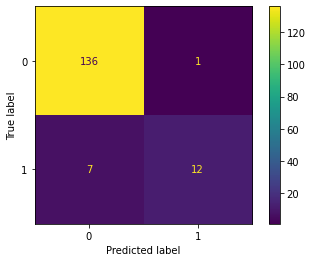

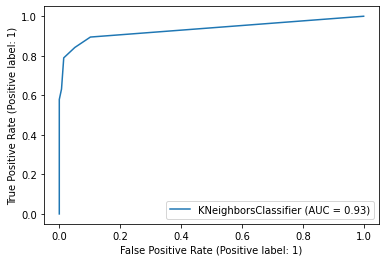

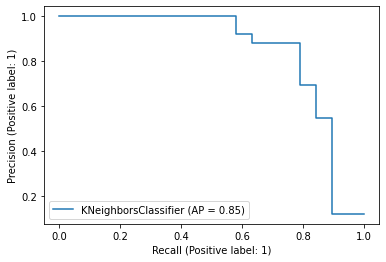

In [55]:
ploting_metrics(Knn_model, X_val, y_val, y_pred_V)

### Testing Model

In [56]:
y_pred_T = knn.predict(X_test)

In [57]:
Evaluating_metrics_test(y_test, y_pred_T)

Testing Accuracy: 0.9310344827586207
Testing Recall: 0.7272727272727273
Testing Percision: 0.7272727272727273
Testing F1_Score: 0.7272727272727273
Testing ROC_AUC_curve: 0.8438995215311005
Testing ROC curve: (array([0.        , 0.03947368, 1.        ]), array([0.        , 0.72727273, 1.        ]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.12643678, 0.72727273, 1.        ]), array([1.        , 0.72727273, 0.        ]), array([0, 1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.73      0.73      0.73        11

    accuracy                           0.93        87
   macro avg       0.84      0.84      0.84        87
weighted avg       0.93      0.93      0.93        87

--------------------------------------------------


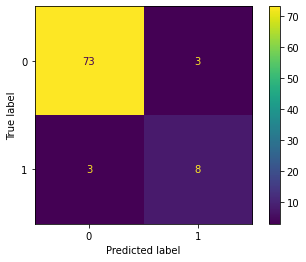

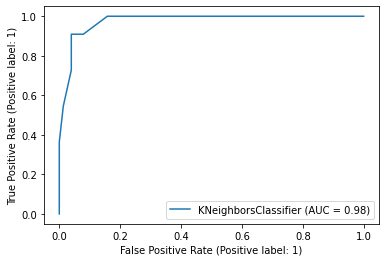

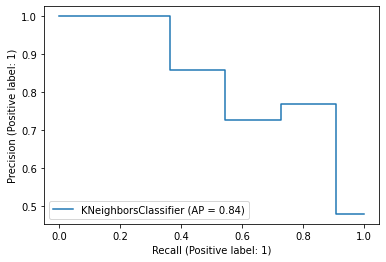

In [58]:
ploting_metrics_test(Knn_model, X_test, y_test, y_pred_T)

# Training model with **Hyperparameter** tunning

### Training The Model

In [59]:
# Training model with Hyperparameter tunning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#Hyperparameters Tuning
knn_params = {
    "n_neighbors": range(1, 30, 2),
    "weights": ["uniform", "distance"], 
    "metric": ["euclidean", "manhattan", "minkowski"]
}

knn = KNeighborsClassifier()

#GridSearch
knn_grid_search = GridSearchCV(estimator = knn, param_grid = knn_params, scoring = "accuracy")
grid_results = knn_grid_search.fit(X_train, y_train)

#Best Model
final_knn_model = knn.set_params(**grid_results.best_params_)
final_knn_model.fit(X_train, y_train)
y_knn_val_pred = final_knn_model.predict(X_val)

In [60]:
Evaluating_metrics(y_val, y_knn_val_pred)

Training Accuracy: 0.9615384615384616
Training Recall: 0.7368421052631579
Training Percision: 0.9333333333333333
Training F1_Score: 0.8235294117647058
Training ROC_AUC_curve: 0.8647714175950826
Training ROC curve: (array([0.        , 0.00729927, 1.        ]), array([0.        , 0.73684211, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.93333333, 1.        ]), array([1.        , 0.73684211, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       137
           1       0.93      0.74      0.82        19

    accuracy                           0.96       156
   macro avg       0.95      0.86      0.90       156
weighted avg       0.96      0.96      0.96       156

--------------------------------------------------


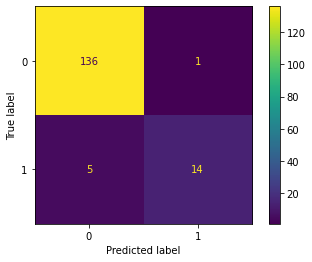

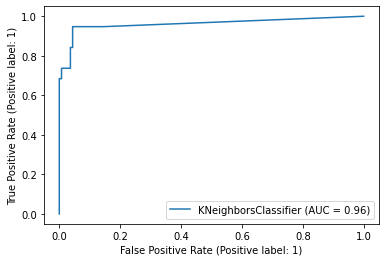

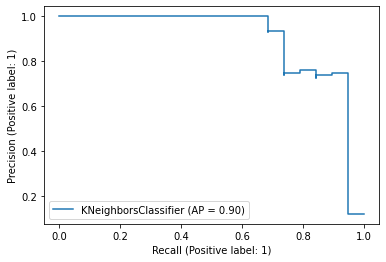

In [61]:
ploting_metrics(final_knn_model, X_val, y_val, y_knn_val_pred)

### Testing The Model

In [62]:
final_knn_model.fit(X_train, y_train)
y_knn_test_pred = final_knn_model.predict(X_test)

In [63]:
Evaluating_metrics_test(y_test, y_knn_test_pred)

Testing Accuracy: 0.9425287356321839
Testing Recall: 0.7272727272727273
Testing Percision: 0.8
Testing F1_Score: 0.761904761904762
Testing ROC_AUC_curve: 0.8504784688995216
Testing ROC curve: (array([0.        , 0.02631579, 1.        ]), array([0.        , 0.72727273, 1.        ]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.12643678, 0.8       , 1.        ]), array([1.        , 0.72727273, 0.        ]), array([0, 1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.80      0.73      0.76        11

    accuracy                           0.94        87
   macro avg       0.88      0.85      0.86        87
weighted avg       0.94      0.94      0.94        87

--------------------------------------------------


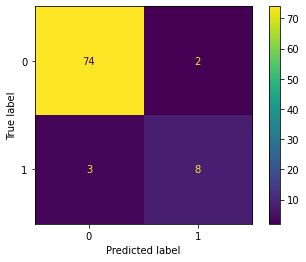

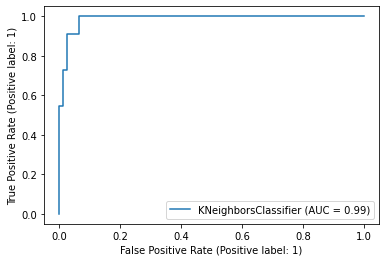

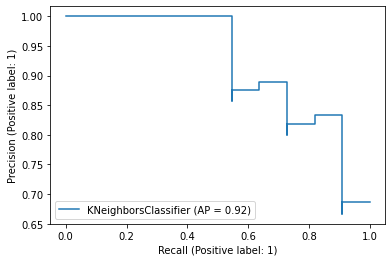

In [64]:
ploting_metrics_test(final_knn_model, X_test, y_test, y_knn_test_pred)

### Getting Knn Scores

In [65]:
# Knn Scores
knn_acc = accuracy_score(y_test, y_knn_test_pred)
knn_recall = recall_score(y_test, y_knn_test_pred)
knn_precision = precision_score(y_test, y_knn_test_pred)
knn_f1_scor = f1_score(y_test, y_knn_test_pred)
knn_roc_auc_scor = roc_auc_score(y_test, y_knn_test_pred)
knn_roc_curv = roc_curve(y_test, y_knn_test_pred)
knn_prec_recall_curve = precision_recall_curve(y_test, y_knn_test_pred)

In [66]:
# List of Knn scores 
knn_scores = [knn_acc, knn_recall, knn_precision, knn_f1_scor, knn_roc_auc_scor]

In [67]:
knn_scores

[0.9425287356321839,
 0.7272727272727273,
 0.8,
 0.761904761904762,
 0.8504784688995216]

In [68]:
final_knn_model.get_params() 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'distance'}

In [69]:
knn_grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [70]:
knn_grid_search.best_score_

0.9435483870967742

In [71]:
knn_grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [72]:
grid_results.get_params() 

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'manhattan',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 9,
 'estimator__p': 2,
 'estimator__weights': 'distance',
 'estimator': KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance'),
 'n_jobs': None,
 'param_grid': {'n_neighbors': range(1, 30, 2),
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan', 'minkowski']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

#**Using Logistic Regression classifier:**

# Training model without Hyperparameter tunning

### Training Model

In [73]:
# Training model without Hyperparameter tunning
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
y_pred_V = logreg.predict(X_val)

In [74]:
Evaluating_metrics(y_val, y_pred_V)

Training Accuracy: 0.9487179487179487
Training Recall: 0.7368421052631579
Training Percision: 0.8235294117647058
Training F1_Score: 0.7777777777777778
Training ROC_AUC_curve: 0.85747214752209
Training ROC curve: (array([0.        , 0.02189781, 1.        ]), array([0.        , 0.73684211, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.82352941, 1.        ]), array([1.        , 0.73684211, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       137
           1       0.82      0.74      0.78        19

    accuracy                           0.95       156
   macro avg       0.89      0.86      0.87       156
weighted avg       0.95      0.95      0.95       156

--------------------------------------------------


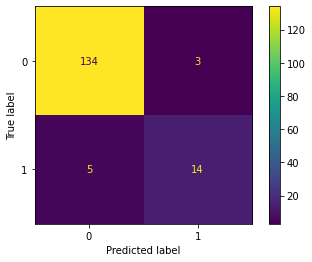

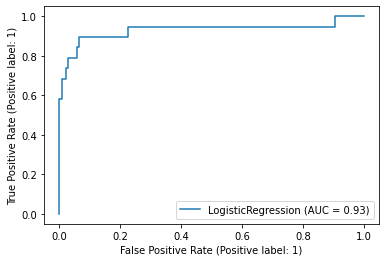

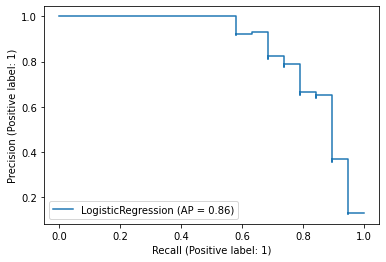

In [75]:
ploting_metrics(logreg_model, X_val, y_val, y_pred_V)

### Testing Model

In [76]:
y_pred_T = logreg.predict(X_test)

In [77]:
Evaluating_metrics_test(y_test, y_pred_T)

Testing Accuracy: 0.9540229885057471
Testing Recall: 0.7272727272727273
Testing Percision: 0.8888888888888888
Testing F1_Score: 0.7999999999999999
Testing ROC_AUC_curve: 0.8570574162679426
Testing ROC curve: (array([0.        , 0.01315789, 1.        ]), array([0.        , 0.72727273, 1.        ]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.12643678, 0.88888889, 1.        ]), array([1.        , 0.72727273, 0.        ]), array([0, 1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.89      0.73      0.80        11

    accuracy                           0.95        87
   macro avg       0.93      0.86      0.89        87
weighted avg       0.95      0.95      0.95        87

--------------------------------------------------


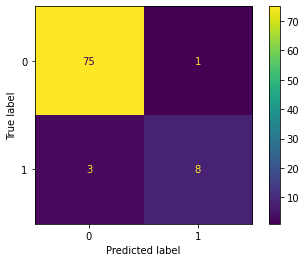

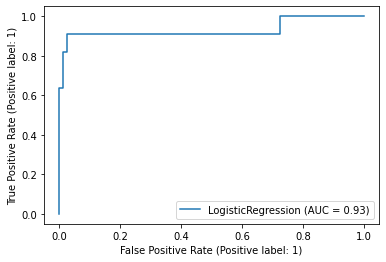

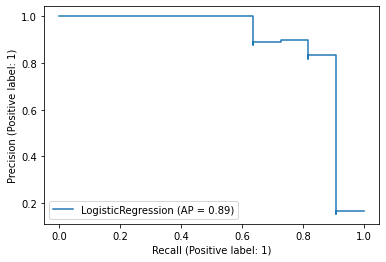

In [78]:
ploting_metrics_test(logreg_model, X_test, y_test, y_pred_T)

# Training Model Using **Hyperparameter** Tuning



### Training model

In [79]:
#Hyperparameters Tuning
logreg_params = [
    {
        "penalty": ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 1000, 2500, 5000]
    }
]

logreg_model = LogisticRegression()
#apply Grid Search
logreg_grid_search = GridSearchCV(estimator = logreg_model, param_grid = logreg_params, scoring = "accuracy")
grid_results = logreg_grid_search.fit(X_train, y_train)
final_logreg_model = logreg_model.set_params(**grid_results.best_params_)
final_logreg_model.fit(X_train, y_train)
y_logreg_val_pred = final_logreg_model.predict(X_val)

In [80]:
Evaluating_metrics(y_val, y_logreg_val_pred)

Training Accuracy: 0.9551282051282052
Training Recall: 0.7368421052631579
Training Percision: 0.875
Training F1_Score: 0.7999999999999999
Training ROC_AUC_curve: 0.8611217825585863
Training ROC curve: (array([0.        , 0.01459854, 1.        ]), array([0.        , 0.73684211, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.875     , 1.        ]), array([1.        , 0.73684211, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       137
           1       0.88      0.74      0.80        19

    accuracy                           0.96       156
   macro avg       0.92      0.86      0.89       156
weighted avg       0.95      0.96      0.95       156

--------------------------------------------------


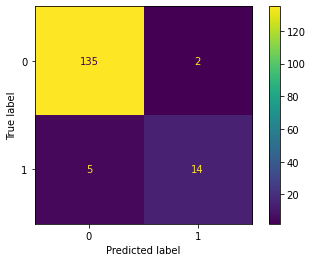

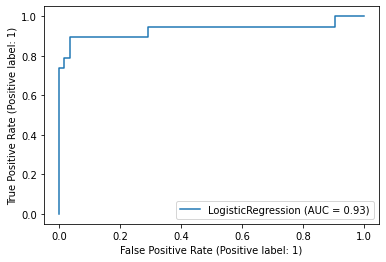

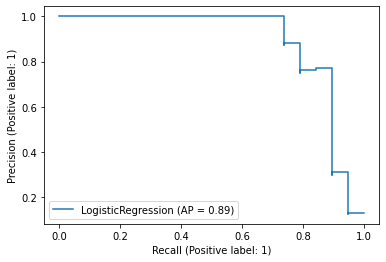

In [81]:
ploting_metrics(final_logreg_model, X_val, y_val, y_logreg_val_pred)

In [82]:
logreg_grid_search.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [83]:
logreg_grid_search.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

### Testing Model

In [84]:
y_logreg_test_pred = final_logreg_model.predict(X_test)

In [85]:
Evaluating_metrics_test(y_test, y_logreg_test_pred)

Testing Accuracy: 0.9655172413793104
Testing Recall: 0.7272727272727273
Testing Percision: 1.0
Testing F1_Score: 0.8421052631578948
Testing ROC_AUC_curve: 0.8636363636363636
Testing ROC curve: (array([0., 0., 1.]), array([0.        , 0.72727273, 1.        ]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.12643678, 1.        , 1.        ]), array([1.        , 0.72727273, 0.        ]), array([0, 1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.73      0.84        11

    accuracy                           0.97        87
   macro avg       0.98      0.86      0.91        87
weighted avg       0.97      0.97      0.96        87

--------------------------------------------------


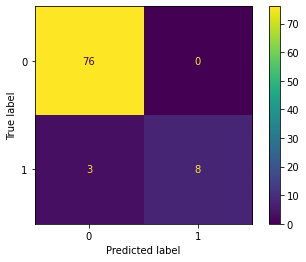

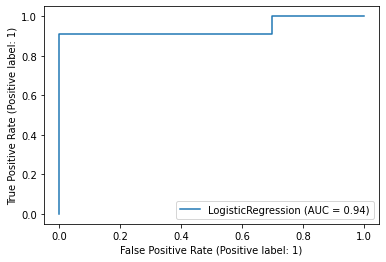

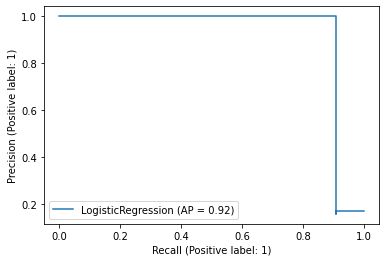

In [86]:
ploting_metrics_test(final_logreg_model, X_test, y_test, y_logreg_test_pred)

## Getting Logistic Regression Scores 

In [87]:
# Logreg Scores
logreg_acc = accuracy_score(y_test, y_logreg_test_pred)
logreg_recall = recall_score(y_test, y_logreg_test_pred)
logreg_precision = precision_score(y_test, y_logreg_test_pred)
logreg_f1_scor = f1_score(y_test, y_logreg_test_pred)
logreg_roc_auc_scor = roc_auc_score(y_test, y_logreg_test_pred)
logreg_roc_curv = roc_curve(y_test, y_logreg_test_pred)
logreg_prec_recall_curve = precision_recall_curve(y_test, y_logreg_test_pred)

In [88]:
# List of logreg scores 
logreg_scores = [logreg_acc, logreg_recall, logreg_precision, logreg_f1_scor, logreg_roc_auc_scor]

In [89]:
logreg_scores

[0.9655172413793104,
 0.7272727272727273,
 1.0,
 0.8421052631578948,
 0.8636363636363636]

In [90]:
logreg_grid_search.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [91]:
logreg_grid_search.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [92]:
logreg_grid_search.best_score_

0.9403225806451612

#**Using Naïve Bayes classifier:**

# Using Gaussian NB

# Trainig Model without Hyperparameter

### Training The Model

In [93]:
# Training model without Hyperparameter tunning
Gaussian_NB = GaussianNB()
Gaussian_NB = Gaussian_NB.fit(X_train, y_train)
y_Gaussian_NB_val_pred = Gaussian_NB.predict(X_val)

In [94]:
Evaluating_metrics(y_val, y_Gaussian_NB_val_pred)

Training Accuracy: 0.782051282051282
Training Recall: 0.8947368421052632
Training Percision: 0.3469387755102041
Training F1_Score: 0.5
Training ROC_AUC_curve: 0.8305800998847486
Training ROC curve: (array([0.        , 0.23357664, 1.        ]), array([0.        , 0.89473684, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.34693878, 1.        ]), array([1.        , 0.89473684, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       137
           1       0.35      0.89      0.50        19

    accuracy                           0.78       156
   macro avg       0.66      0.83      0.68       156
weighted avg       0.90      0.78      0.82       156

--------------------------------------------------


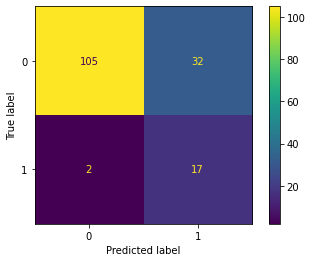

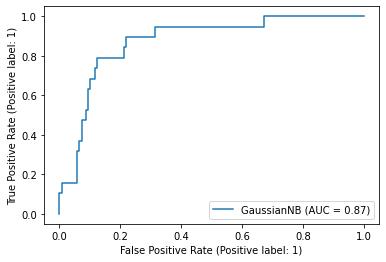

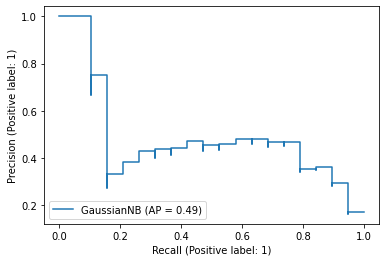

In [95]:
ploting_metrics(Gaussian_NB, X_val, y_val, y_Gaussian_NB_val_pred)

### Testing The Model

In [96]:
y_Gaussian_NB_test_pred = Gaussian_NB.predict(X_test)

In [97]:
Evaluating_metrics_test(y_test, y_Gaussian_NB_test_pred)

Testing Accuracy: 0.7931034482758621
Testing Recall: 0.9090909090909091
Testing Percision: 0.37037037037037035
Testing F1_Score: 0.5263157894736842
Testing ROC_AUC_curve: 0.8427033492822966
Testing ROC curve: (array([0.        , 0.22368421, 1.        ]), array([0.        , 0.90909091, 1.        ]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.12643678, 0.37037037, 1.        ]), array([1.        , 0.90909091, 0.        ]), array([0, 1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        76
           1       0.37      0.91      0.53        11

    accuracy                           0.79        87
   macro avg       0.68      0.84      0.70        87
weighted avg       0.91      0.79      0.82        87

--------------------------------------------------


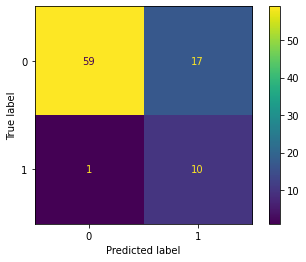

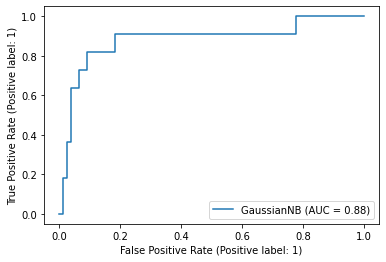

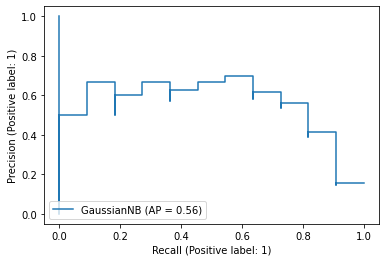

In [98]:
ploting_metrics_test(Gaussian_NB, X_test, y_test, y_Gaussian_NB_test_pred)

# Training The Model Using **Hyperparameters** Tuning

### Training The Model

In [99]:
#Hyperparameters Tuning
NB_param={'var_smoothing': np.logspace(0,-9, num=100)}

NB = GaussianNB()

#Applying GridSearch
grid_NB = GridSearchCV(NB, NB_param, scoring='accuracy')
grid_results = grid_NB.fit(X_train, y_train)
final_NB_model = NB.set_params(**grid_results.best_params_)
final_NB_model.fit(X_train, y_train)
y_NB_val_pred = final_NB_model.predict(X_val)


In [100]:
Evaluating_metrics(y_val, y_NB_val_pred)

Training Accuracy: 0.9358974358974359
Training Recall: 0.5789473684210527
Training Percision: 0.8461538461538461
Training F1_Score: 0.6875
Training ROC_AUC_curve: 0.7821744141375336
Training ROC curve: (array([0.        , 0.01459854, 1.        ]), array([0.        , 0.57894737, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.84615385, 1.        ]), array([1.        , 0.57894737, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       137
           1       0.85      0.58      0.69        19

    accuracy                           0.94       156
   macro avg       0.90      0.78      0.83       156
weighted avg       0.93      0.94      0.93       156

--------------------------------------------------


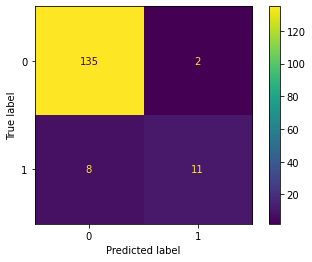

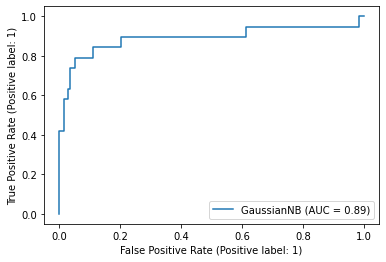

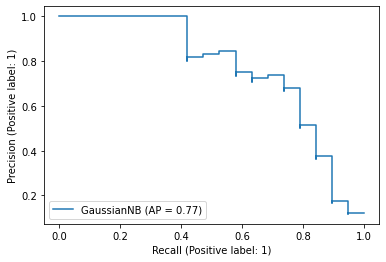

In [101]:
ploting_metrics(final_NB_model, X_val, y_val, y_NB_val_pred)

### Testing The Model

In [102]:
y_NB_test_pred = final_NB_model.predict(X_test)

In [103]:
Evaluating_metrics_test(y_test, y_NB_test_pred)

Testing Accuracy: 0.9425287356321839
Testing Recall: 0.5454545454545454
Testing Percision: 1.0
Testing F1_Score: 0.7058823529411764
Testing ROC_AUC_curve: 0.7727272727272727
Testing ROC curve: (array([0., 0., 1.]), array([0.        , 0.54545455, 1.        ]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.12643678, 1.        , 1.        ]), array([1.        , 0.54545455, 0.        ]), array([0, 1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       1.00      0.55      0.71        11

    accuracy                           0.94        87
   macro avg       0.97      0.77      0.84        87
weighted avg       0.95      0.94      0.93        87

--------------------------------------------------


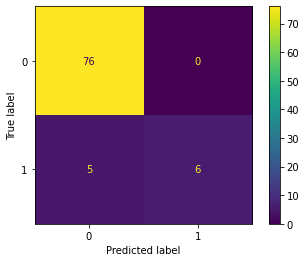

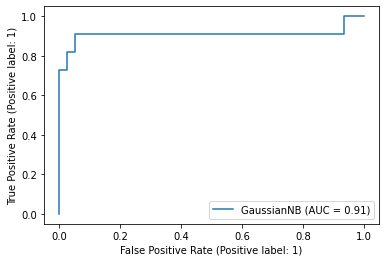

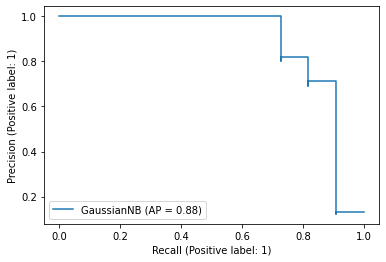

In [104]:
ploting_metrics_test(final_NB_model, X_test, y_test, y_NB_test_pred)

## Getting Gaussian NB Scores

In [105]:
# Multi_NB Scores
Gaussian_NB_acc = accuracy_score(y_test, y_NB_test_pred)
Gaussian_NB_recall = recall_score(y_test, y_NB_test_pred)
Gaussian_NB_precision = precision_score(y_test, y_NB_test_pred)
Gaussian_NB_f1_scor = f1_score(y_test, y_NB_test_pred)
Gaussian_NB_roc_auc_scor = roc_auc_score(y_test, y_NB_test_pred)
Gaussian_NB_roc_curv = roc_curve(y_test, y_NB_test_pred)
Gaussian_NB_prec_recall_curve = precision_recall_curve(y_test, y_NB_test_pred)

In [106]:
# List of Gaussian_NB scores 
Gaussian_NB_scores = [Gaussian_NB_acc, Gaussian_NB_recall, Gaussian_NB_precision, Gaussian_NB_f1_scor, Gaussian_NB_roc_auc_scor]

In [107]:
Gaussian_NB_scores

[0.9425287356321839,
 0.5454545454545454,
 1.0,
 0.7058823529411764,
 0.7727272727272727]

In [108]:
grid_NB.best_score_

0.9

In [109]:
grid_NB.best_params_

{'var_smoothing': 0.03511191734215131}

In [110]:
grid_results.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__priors': None,
 'estimator__var_smoothing': 0.03511191734215131,
 'estimator': GaussianNB(var_smoothing=0.03511191734215131),
 'n_jobs': None,
 'param_grid': {'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
         4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
         1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
         8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
         3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
         1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
         6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
         2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
         1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
         5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
         2.31012970e-04, 1.87381742e-04, 1.519911

# **Using Desicion Tree Classifier:**

# Training The Model without Hyperparameter Tuning

### Training The Model

In [111]:
# Training model without Hyperparameter
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train, y_train)
y_pred_V = DT.predict(X_val)

In [112]:
Evaluating_metrics(y_val, y_pred_V)

Training Accuracy: 0.9807692307692307
Training Recall: 0.9473684210526315
Training Percision: 0.9
Training F1_Score: 0.9230769230769231
Training ROC_AUC_curve: 0.966384940453323
Training ROC curve: (array([0.        , 0.01459854, 1.        ]), array([0.        , 0.94736842, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.9       , 1.        ]), array([1.        , 0.94736842, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.90      0.95      0.92        19

    accuracy                           0.98       156
   macro avg       0.95      0.97      0.96       156
weighted avg       0.98      0.98      0.98       156

--------------------------------------------------


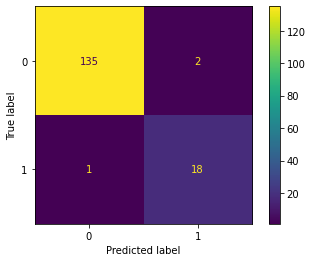

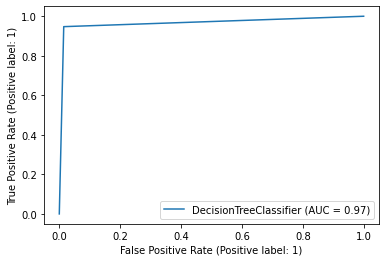

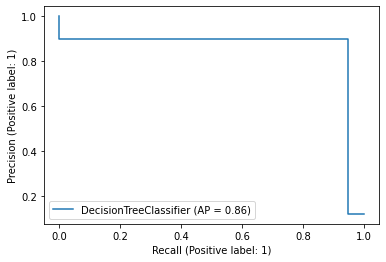

In [113]:
ploting_metrics(DT_model, X_val, y_val, y_pred_V)

### Testing The Model

In [114]:
y_pred_T = DT.predict(X_test)

In [115]:
Evaluating_metrics_test(y_test, y_pred_T)

Testing Accuracy: 0.9885057471264368
Testing Recall: 1.0
Testing Percision: 0.9166666666666666
Testing F1_Score: 0.9565217391304348
Testing ROC_AUC_curve: 0.9934210526315789
Testing ROC curve: (array([0.        , 0.01315789, 1.        ]), array([0., 1., 1.]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.91666667, 1.        ]), array([1., 0.]), array([1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.92      1.00      0.96        11

    accuracy                           0.99        87
   macro avg       0.96      0.99      0.97        87
weighted avg       0.99      0.99      0.99        87

--------------------------------------------------


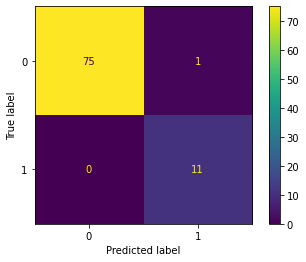

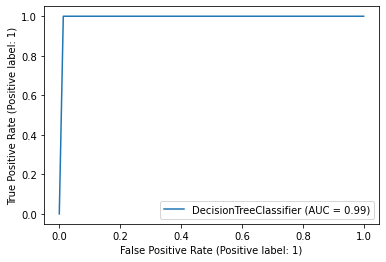

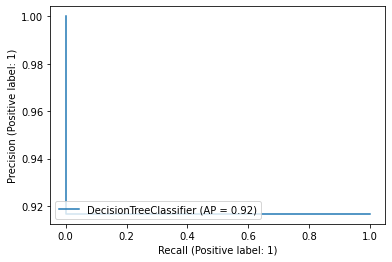

In [116]:
ploting_metrics_test(DT_model, X_test, y_test, y_pred_T)

# Training The Model Using **Hyperparameter** Tuning

### Training The Model

In [117]:
#Hyperparameters Tuning
DT_param={
    'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 3]
}

DT_model = DecisionTreeClassifier()

#Applying GridSearch
DT_grid_search = GridSearchCV(DT_model, DT_param, scoring='accuracy')
# Training model
grid_results = DT_grid_search.fit(X_train, y_train)
final_DT_model = DT_model.set_params(**grid_results.best_params_)
#Traning model with the best parameters
final_DT_model.fit(X_train, y_train)
y_DT_val_pred = final_DT_model.predict(X_val)


In [118]:
Evaluating_metrics(y_val, y_DT_val_pred)

Training Accuracy: 0.9615384615384616
Training Recall: 0.8947368421052632
Training Percision: 0.8095238095238095
Training F1_Score: 0.8500000000000001
Training ROC_AUC_curve: 0.9327698809066463
Training ROC curve: (array([0.        , 0.02919708, 1.        ]), array([0.        , 0.89473684, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.80952381, 1.        ]), array([1.        , 0.89473684, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       137
           1       0.81      0.89      0.85        19

    accuracy                           0.96       156
   macro avg       0.90      0.93      0.91       156
weighted avg       0.96      0.96      0.96       156

--------------------------------------------------


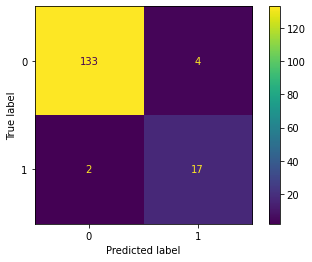

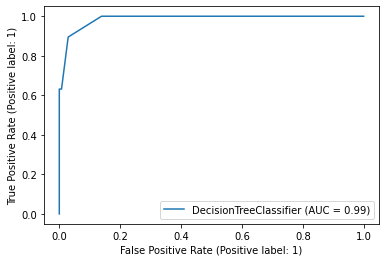

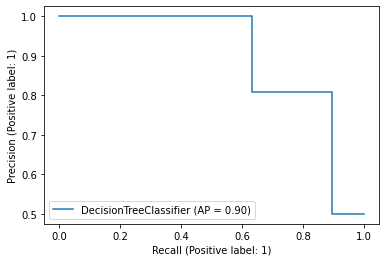

In [119]:
ploting_metrics(final_DT_model, X_val, y_val, y_DT_val_pred)

### Testing The Model

In [120]:
y_DT_test_pred = final_DT_model.predict(X_test)

In [121]:
Evaluating_metrics_test(y_test, y_DT_test_pred)

Testing Accuracy: 0.9885057471264368
Testing Recall: 1.0
Testing Percision: 0.9166666666666666
Testing F1_Score: 0.9565217391304348
Testing ROC_AUC_curve: 0.9934210526315789
Testing ROC curve: (array([0.        , 0.01315789, 1.        ]), array([0., 1., 1.]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.91666667, 1.        ]), array([1., 0.]), array([1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.92      1.00      0.96        11

    accuracy                           0.99        87
   macro avg       0.96      0.99      0.97        87
weighted avg       0.99      0.99      0.99        87

--------------------------------------------------


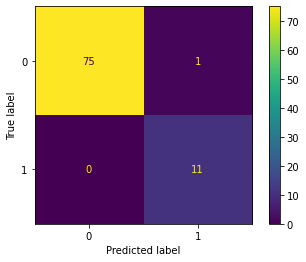

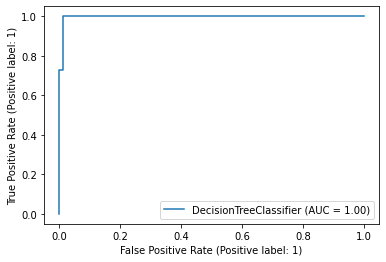

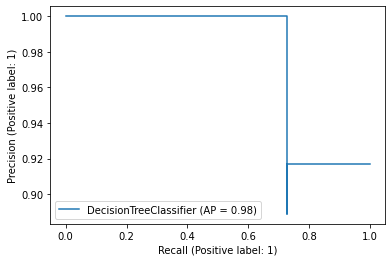

In [122]:
ploting_metrics_test(final_DT_model, X_test, y_test, y_DT_test_pred)

## Getting Decision Tree Scores

In [123]:
# DT Scores
DT_acc = accuracy_score(y_test, y_DT_test_pred)
DT_recall = recall_score(y_test, y_DT_test_pred)
DT_precision = precision_score(y_test, y_DT_test_pred)
DT_f1_scor = f1_score(y_test, y_DT_test_pred)
DT_roc_auc_scor = roc_auc_score(y_test, y_DT_test_pred)
DT_roc_curv = roc_curve(y_test, y_DT_test_pred)
DT_prec_recall_curve = precision_recall_curve(y_test, y_DT_test_pred)

In [124]:
# List of DT scores 
DT_scores = [DT_acc, DT_recall, DT_precision, DT_f1_scor, DT_roc_auc_scor]

In [125]:
DT_scores

[0.9885057471264368,
 1.0,
 0.9166666666666666,
 0.9565217391304348,
 0.9934210526315789]

In [126]:
grid_results.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

In [127]:
grid_results.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [128]:
DT_grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [129]:
DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

In [130]:
DT_grid_search.best_score_

0.953225806451613

## Plotting Decision Tree

In [131]:
from sklearn import tree
text_representation = tree.export_text(final_DT_model)

In [132]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

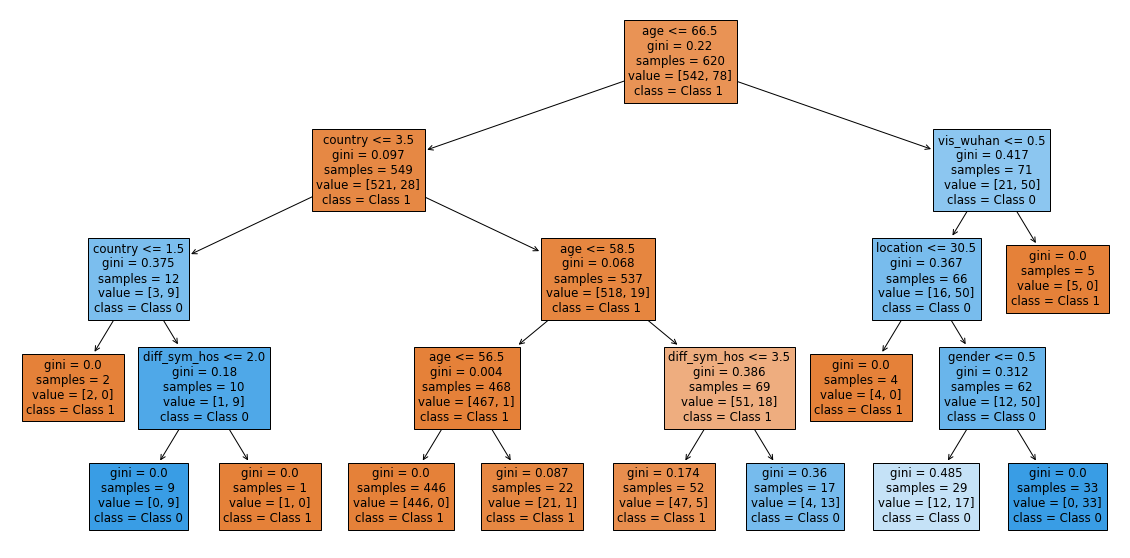

In [133]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(final_DT_model,feature_names=list(X_train),  
                   class_names=['Class 1 ','Class 0'],
                   filled=True)
fig.savefig("decistion_tree.png")

# **Using Support Vector Machine (SVM) Classifier:**



# Training The Model without using Hyperparameters

### Training The Model

In [134]:
# Trainig model without Hyperparameter tuning
from sklearn.svm import SVC
SVM = SVC()
SVM_model = SVM.fit(X_train, y_train)
y_pred_V = SVM.predict(X_val)

In [135]:
Evaluating_metrics(y_val, y_pred_V)

Training Accuracy: 0.9615384615384616
Training Recall: 0.6842105263157895
Training Percision: 1.0
Training F1_Score: 0.8125000000000001
Training ROC_AUC_curve: 0.8421052631578947
Training ROC curve: (array([0., 0., 1.]), array([0.        , 0.68421053, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 1.        , 1.        ]), array([1.        , 0.68421053, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       137
           1       1.00      0.68      0.81        19

    accuracy                           0.96       156
   macro avg       0.98      0.84      0.90       156
weighted avg       0.96      0.96      0.96       156

--------------------------------------------------


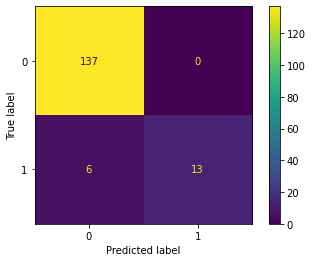

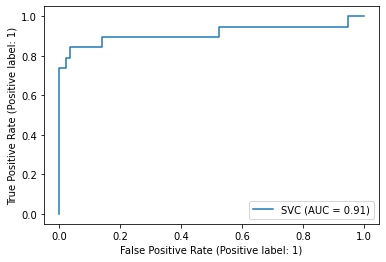

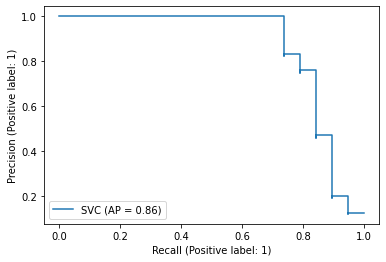

In [136]:
ploting_metrics(SVM_model, X_val, y_val, y_pred_V)

### Testing The Model

In [137]:
y_pred_T = SVM.predict(X_test)

In [138]:
Evaluating_metrics_test(y_test, y_pred_T)

Testing Accuracy: 0.9425287356321839
Testing Recall: 0.5454545454545454
Testing Percision: 1.0
Testing F1_Score: 0.7058823529411764
Testing ROC_AUC_curve: 0.7727272727272727
Testing ROC curve: (array([0., 0., 1.]), array([0.        , 0.54545455, 1.        ]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.12643678, 1.        , 1.        ]), array([1.        , 0.54545455, 0.        ]), array([0, 1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       1.00      0.55      0.71        11

    accuracy                           0.94        87
   macro avg       0.97      0.77      0.84        87
weighted avg       0.95      0.94      0.93        87

--------------------------------------------------


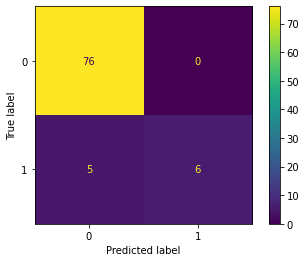

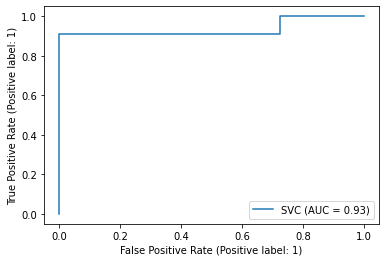

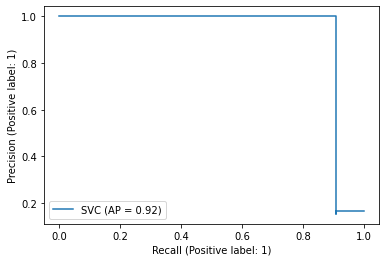

In [139]:
ploting_metrics_test(SVM_model, X_test, y_test, y_pred_T)

# Training The Model using **Hyperparameter** Tuning

### Training The Model

In [140]:
from sklearn.svm import SVC
SVM_param = {
    "gamma": [0.01, 0.1, 1.0, 10, 100],
    "C": [0.1, 1.0, 10, 100],
    "kernel": ['linear']#, 'rbf', 'poly']
}

SVM_model = SVC(probability = True)

#Applying GridSearch
SVM_grid_search = GridSearchCV(SVM_model, SVM_param, scoring='accuracy')

# Training model
grid_results = SVM_grid_search.fit(X_train, y_train)
final_SVM_model = SVM_model.set_params(**grid_results.best_params_)

#Traning model with the best parameters
final_SVM_model.fit(X_train, y_train)
y_SVM_val_pred = final_SVM_model.predict(X_val)


In [141]:
Evaluating_metrics(y_val, y_SVM_val_pred)

Training Accuracy: 0.9487179487179487
Training Recall: 0.7368421052631579
Training Percision: 0.8235294117647058
Training F1_Score: 0.7777777777777778
Training ROC_AUC_curve: 0.85747214752209
Training ROC curve: (array([0.        , 0.02189781, 1.        ]), array([0.        , 0.73684211, 1.        ]), array([2, 1, 0]))
Training Precision_Recaal_curve: (array([0.12179487, 0.82352941, 1.        ]), array([1.        , 0.73684211, 0.        ]), array([0, 1]))



******************classification report for training data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       137
           1       0.82      0.74      0.78        19

    accuracy                           0.95       156
   macro avg       0.89      0.86      0.87       156
weighted avg       0.95      0.95      0.95       156

--------------------------------------------------


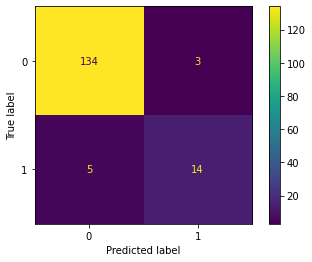

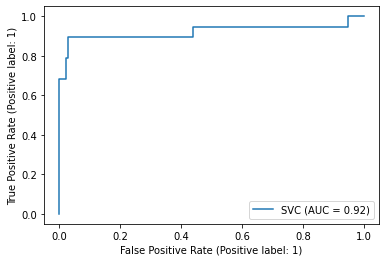

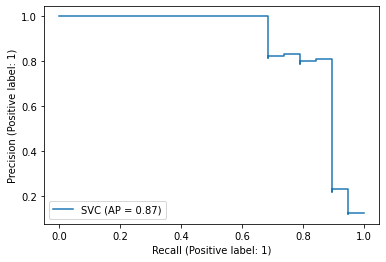

In [142]:
ploting_metrics(final_SVM_model, X_val, y_val, y_SVM_val_pred)

### Testing The Model

In [143]:
y_SVM_test_pred = final_SVM_model.predict(X_test)

In [144]:
Evaluating_metrics_test(y_test, y_SVM_test_pred)

Testing Accuracy: 0.9655172413793104
Testing Recall: 0.7272727272727273
Testing Percision: 1.0
Testing F1_Score: 0.8421052631578948
Testing ROC_AUC_curve: 0.8636363636363636
Testing ROC curve: (array([0., 0., 1.]), array([0.        , 0.72727273, 1.        ]), array([2, 1, 0]))
Testing Precision_Recaal_curve: (array([0.12643678, 1.        , 1.        ]), array([1.        , 0.72727273, 0.        ]), array([0, 1]))



******************classification report for testing data****************

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.73      0.84        11

    accuracy                           0.97        87
   macro avg       0.98      0.86      0.91        87
weighted avg       0.97      0.97      0.96        87

--------------------------------------------------


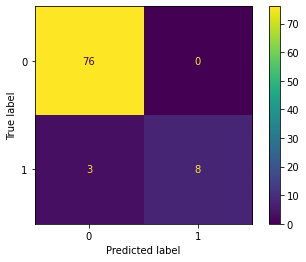

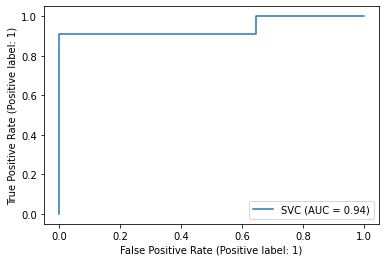

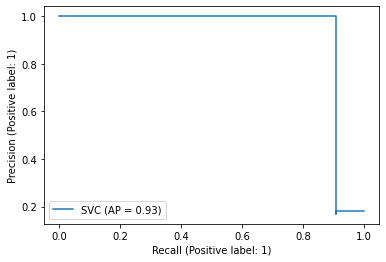

In [145]:
ploting_metrics_test(final_SVM_model, X_test, y_test, y_SVM_test_pred)

## Getting SVM Scores

In [146]:
# SVM Scores
SVM_acc = accuracy_score(y_test, y_SVM_test_pred)
SVM_recall = recall_score(y_test, y_SVM_test_pred)
SVM_precision = precision_score(y_test, y_SVM_test_pred)
SVM_f1_scor = f1_score(y_test, y_SVM_test_pred)
SVM_roc_auc_scor = roc_auc_score(y_test, y_SVM_test_pred)
SVM_roc_curv = roc_curve(y_test, y_SVM_test_pred)
SVM_prec_recall_curve = precision_recall_curve(y_test, y_SVM_test_pred)


In [147]:
# List of SVM scores 
SVM_scores = [SVM_acc, SVM_recall, SVM_precision, SVM_f1_scor, SVM_roc_auc_scor]

In [148]:
SVM_scores

[0.9655172413793104,
 0.7272727272727273,
 1.0,
 0.8421052631578948,
 0.8636363636363636]

In [149]:
SVM_grid_search.best_score_

0.9370967741935484

In [150]:
SVM_grid_search.best_estimator_

SVC(gamma=0.01, kernel='linear', probability=True)

In [151]:
SVM_grid_search.best_params_

{'C': 1.0, 'gamma': 0.01, 'kernel': 'linear'}

# Plotting and Comparing between Models to get best Classifier

In [152]:
data_scores = {"Metric":["Accuracy","Precision","Recall","F1_score","ROC_AUC_score"],
               "KNN":[knn_scores[0],knn_scores[1],knn_scores[2],knn_scores[3],knn_scores[4]],
               "Logreg":[logreg_scores[0],logreg_scores[1],logreg_scores[2],logreg_scores[3],logreg_scores[4]],
               "Gaussian Naive Bayes":[Gaussian_NB_scores[0],Gaussian_NB_scores[1],Gaussian_NB_scores[2],Gaussian_NB_scores[3],Gaussian_NB_scores[4]],
               "Decision Tree":[DT_scores[0],DT_scores[1],DT_scores[2],DT_scores[3],DT_scores[4]],
               "SVM":[SVM_scores[0],SVM_scores[1],SVM_scores[2],SVM_scores[3],SVM_scores[4]]}

In [153]:
df_scores= pd.DataFrame(data_scores)
df_scores

,Metric,KNN,Logreg,Gaussian Naive Bayes,Decision Tree,SVM
0,Accuracy,0.942529,0.965517,0.942529,0.988506,0.965517
1,Precision,0.727273,0.727273,0.545455,1.000000,0.727273
2,Recall,0.800000,1.000000,1.000000,0.916667,1.000000
3,F1_score,0.761905,0.842105,0.705882,0.956522,0.842105
4,ROC_AUC_score,0.850478,0.863636,0.772727,0.993421,0.863636


In [154]:
# ax = plt.gca() 
  
# # line plot for math marks
# df_scores.plot(kind = 'line',
#         x = 'Accuracy',
#         y = 'KNN',
#         color = 'green',ax = ax)
  
# # line plot for physics marks
# df_scores.plot(kind = 'line',x = 'Accuracy',
#         y = 'Logreg',
#         color = 'blue',ax = ax)
  
# # line plot for chemistry marks
# df_scores.plot(kind = 'line',x = 'ROC_AUC_score',
#         y = 'SVM',
#         color = 'black',ax = ax)

# # line plot for chemistry marks
# df_scores.plot(kind = 'line',x = 'ROC_AUC_score',
#         y = 'Decision Tree',
#         color = 'orange',ax = ax)

# # line plot for chemistry marks
# df_scores.plot(kind = 'line',x = 'ROC_AUC_score',
#         y = 'Multinomial Naive Bayes',
#         color = 'yellow',ax = ax)

# # line plot for chemistry marks
# df_scores.plot(kind = 'line',x = 'ROC_AUC_score',
#         y = 'Bernoulli Naive Bayes',
#         color = 'brown',ax = ax)

  
# # set the title
# plt.title('LinePlots')
  
# # show the plot
# plt.show()

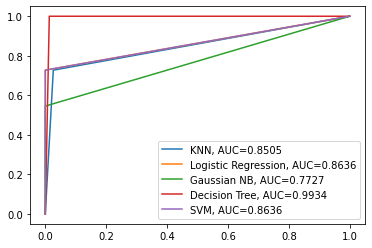

In [155]:
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_knn_test_pred)
auc = round(metrics.roc_auc_score(y_test, y_knn_test_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_logreg_test_pred)
auc = round(metrics.roc_auc_score(y_test, y_logreg_test_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_NB_test_pred)
auc = round(metrics.roc_auc_score(y_test, y_NB_test_pred), 4)
plt.plot(fpr,tpr,label="Gaussian NB, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_DT_test_pred)
auc = round(metrics.roc_auc_score(y_test, y_DT_test_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_SVM_test_pred)
auc = round(metrics.roc_auc_score(y_test, y_SVM_test_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))
plt.legend()